In [1]:
from scipy.io import loadmat, savemat
import numpy as np 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# additional packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Lambda 
from keras import layers
from keras import models
import cv2

In [3]:
# Load Data

filename = 'data_64.mat'
data = loadmat(filename)
X = data['X']
y = data['y']
print('Num images: ', len(X))
print('Image shape: ', X[0].shape)
print('Num classes: ', len(set(y.flatten())))


Num images:  198578
Image shape:  (64, 64, 3)
Num classes:  11


In [4]:
for i, img in enumerate(X):
    cv2.imwrite('images_64/{}.png'.format(i), img)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [13]:
# Resize images
# result = []
# for i, img in enumerate(X):
#     res = cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
#     result.append(res)

# X = np.array(result)
# print(X.shape)
# filename = 'data_64.mat'
# data = {
#     'X': X,
#     'y': y
# }
# savemat(filename, data)


In [15]:
Xtrainval, Xtest, ytrainval, ytest = train_test_split(X, y, test_size=0.30, random_state=42)
print('Training/Validation set size: ', len(Xtrainval))
print('Testing set size: ', len(Xtest))

Training/Validation set size:  139004
Testing set size:  59574


In [20]:
# Class Distribution 

def showDistribution(X, y):
    fig, ax = plt.subplots(2, figsize=(20,15))
    fig.subplots_adjust(hspace = .3)
    labels, counts = np.unique(y, return_counts=True)
    print(counts)
    ax[0].bar(labels, counts)
    ax[0].set_xticks(np.arange(12))
    ax[0].set_xticklabels(labels)
    ax[0].set_xlabel('Class #')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Class Distribution')
    plt.show()

# showDistribution(Xtrainval, ytrainval)
# showDistribution(Xtest, ytest)

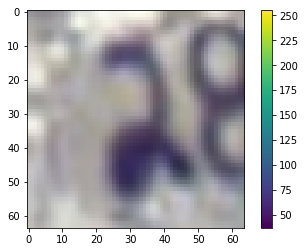

In [21]:
plt.figure()
plt.imshow(Xtrainval[0])
plt.colorbar()
plt.grid(False)

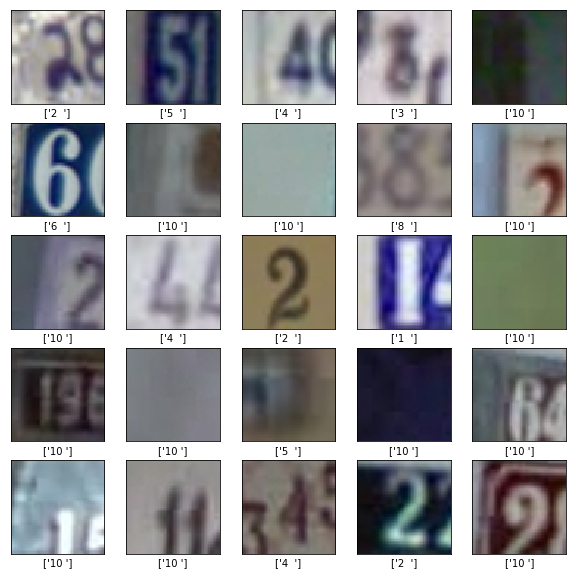

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrainval[i], cmap=plt.cm.binary)
    plt.xlabel(ytrainval[i])


In [43]:
def get_model():
    input_shape = (32,32,3)
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(11, activation='softmax'))
    model.summary()
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
    return model

# get_model()

In [3]:
def getModel2():
    model = models.Sequential()
#     model.add(Lambda(lambda x: tf.image.resize_images(x, (150, 150)), input_shape=(32,32,3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(11, activation='softmax'))
    model.summary()
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
    return model

In [ ]:
from keras import models
from keras import layers
from keras.applications import VGG16

def get_vgg_with_weights():
    conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))
    # conv_base.summary()
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(11, activation='softmax'))
    print('# of trainable weights before freezing the conv base: ', len(model.trainable_weights))
    conv_base.trainable = False
    print('# of trainable weights after freezing the conv base: ', len(model.trainable_weights))
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
    return model

In [10]:
def show_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.figure()
    plt.plot(epochs, loss, 'bo')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training and validation loss')
    plt.show()

In [23]:
#
#
#
#
# VGG w/ pre-trained weights
#
#
#
#

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'train'
validation_dir = 'validation'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=5,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.05,
      horizontal_flip=False,
      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(64, 64),  # all images will be resized to this size
        batch_size=32,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels
val_generator = train_datagen.flow_from_directory(
        validation_dir,  # this is the target directory
        target_size=(64, 64),  # all images will be resized to this size
        batch_size=32,
        class_mode='categorical')

# model = getModel2()
model = get_vgg_with_weights()

# fits the model on batches with real-time data augmentation:
epochs = 20
training_size = 424639
history = model.fit_generator(
    train_generator,
    samples_per_epoch=(training_size / epochs), 
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=50)

# model.save('custom_1.h5')
model.save('vgg_pretrained_1.h5')

Found 424639 images belonging to 11 classes.
Found 181989 images belonging to 11 classes.
# of trainable weights before freezing the conv base:  8
# of trainable weights after freezing the conv base:  8


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=663.0, validation_data=<keras.pre..., epochs=20, validation_steps=50)`


Epoch 1/20
663/663 [==============================] - 303s 456ms/step - loss: 1.6602 - acc: 0.4243 - val_loss: 1.1506 - val_acc: 0.5650
Epoch 2/20
663/663 [==============================] - 298s 450ms/step - loss: 1.0245 - acc: 0.6315 - val_loss: 0.9442 - val_acc: 0.6806
Epoch 3/20
663/663 [==============================] - 298s 450ms/step - loss: 0.7295 - acc: 0.7625 - val_loss: 0.5359 - val_acc: 0.8444
Epoch 4/20
663/663 [==============================] - 298s 450ms/step - loss: 0.5052 - acc: 0.8514 - val_loss: 0.4124 - val_acc: 0.8850
Epoch 5/20
663/663 [==============================] - 298s 450ms/step - loss: 0.4119 - acc: 0.8820 - val_loss: 0.3813 - val_acc: 0.8912
Epoch 6/20
663/663 [==============================] - 298s 450ms/step - loss: 0.3520 - acc: 0.9018 - val_loss: 0.3010 - val_acc: 0.9062
Epoch 7/20
663/663 [==============================] - 298s 450ms/step - loss: 0.3085 - acc: 0.9125 - val_loss: 0.2941 - val_acc: 0.9200
Epoch 8/20
663/663 [============================

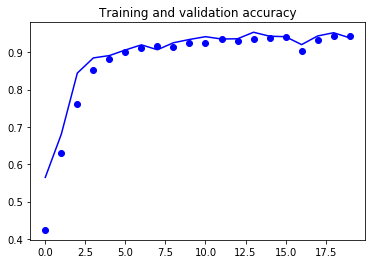

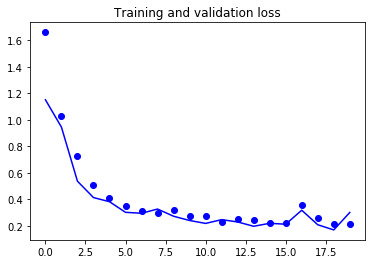

In [19]:
show_history(history)